In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
mdat=pd.read_csv('D:/data/Electricity_data/30minutes_data/gmatrix6.csv',index_col=0)

In [3]:
mdat_row_count=mdat.apply(pd.value_counts)

In [4]:
mdat_row_count.tail(n=6)

,1,2,3,4,5,6,7,8,9,10,...,526,527,528,529,530,531,532,533,534,535
1,1540,1632,1579,1641,1532,1579,1568,1556,1561,1583,...,691,764,738,726,926,870,861,917,952,956
2,240,187,238,221,224,150,223,237,228,239,...,608,612,621,502,135,227,313,382,367,456
3,1141,1167,1246,1209,1023,953,1182,1188,1209,1198,...,1022,960,915,680,527,764,913,954,1002,1028
4,326,312,273,301,488,677,311,310,290,288,...,317,329,370,447,912,674,556,483,465,394
5,55,42,31,34,69,53,53,40,42,45,...,468,481,537,810,927,646,475,382,347,301
6,337,299,272,233,303,227,302,308,309,286,...,533,493,458,474,212,458,521,521,506,504


In [5]:
mdat_rowT=mdat_row_count.T

In [6]:
mdat_rowT.head(n=10)

,1,2,3,4,5,6
1,1540,240,1141,326,55,337
2,1632,187,1167,312,42,299
3,1579,238,1246,273,31,272
4,1641,221,1209,301,34,233
5,1532,224,1023,488,69,303
6,1579,150,953,677,53,227
7,1568,223,1182,311,53,302
8,1556,237,1188,310,40,308
9,1561,228,1209,290,42,309
10,1583,239,1198,288,45,286


In [7]:
mdat_rowT['date']=mdat_rowT.index
mdat_rowT.head()

,1,2,3,4,5,6,date
1,1540,240,1141,326,55,337,1
2,1632,187,1167,312,42,299,2
3,1579,238,1246,273,31,272,3
4,1641,221,1209,301,34,233,4
5,1532,224,1023,488,69,303,5


In [8]:
date_number=pd.read_excel('D:/data/Electricity_data/date_number.xlsx')

In [9]:
date_number=date_number.astype({'date': 'int32'})

In [10]:
mdat_rowT=mdat_rowT.astype({'date': 'int32'})

In [11]:
mdat_rowT1=mdat_rowT.merge(date_number,on='date',how='left')

In [12]:
mdat_rowT1.head()

,1,2,3,4,5,6,date,date1
0,1540,240,1141,326,55,337,1,2009-07-14
1,1632,187,1167,312,42,299,2,2009-07-15
2,1579,238,1246,273,31,272,3,2009-07-16
3,1641,221,1209,301,34,233,4,2009-07-17
4,1532,224,1023,488,69,303,5,2009-07-18


In [14]:
mdat_rowT1['day_of_week'] = mdat_rowT1['date1'].dt.day_name()

In [19]:
mdat_rowT1.head(n=30)

,1,2,3,4,5,6,date,date1,day_of_week
0,1540,240,1141,326,55,337,1,2009-07-14,Tuesday
1,1632,187,1167,312,42,299,2,2009-07-15,Wednesday
2,1579,238,1246,273,31,272,3,2009-07-16,Thursday
3,1641,221,1209,301,34,233,4,2009-07-17,Friday
4,1532,224,1023,488,69,303,5,2009-07-18,Saturday
5,1579,150,953,677,53,227,6,2009-07-19,Sunday
6,1568,223,1182,311,53,302,7,2009-07-20,Monday
7,1556,237,1188,310,40,308,8,2009-07-21,Tuesday
8,1561,228,1209,290,42,309,9,2009-07-22,Wednesday
9,1583,239,1198,288,45,286,10,2009-07-23,Thursday


In [16]:
df0T=pd.read_csv('D:/data/Electricity_data/gmatrix6_date.csv',index_col=0,parse_dates=['date1'])

In [15]:
df0T.head()

,1,2,3,4,5,6,date1
0,1540,240,1141,326,55,337,2009-07-14
1,1632,187,1167,312,42,299,2009-07-15
2,1579,238,1246,273,31,272,2009-07-16
3,1641,221,1209,301,34,233,2009-07-17
4,1532,224,1023,488,69,303,2009-07-18


In [17]:
df0T.columns=['Pattern 1','Pattern 2','Pattern 3','Pattern 4','Pattern 5','Pattern 6','date1']

In [28]:
labels=df0T.columns

In [20]:
df0T.head(n=20)

,1,2,3,4,5,6,date1
0,1540,240,1141,326,55,337,2009-07-14
1,1632,187,1167,312,42,299,2009-07-15
2,1579,238,1246,273,31,272,2009-07-16
3,1641,221,1209,301,34,233,2009-07-17
4,1532,224,1023,488,69,303,2009-07-18
5,1579,150,953,677,53,227,2009-07-19
6,1568,223,1182,311,53,302,2009-07-20
7,1556,237,1188,310,40,308,2009-07-21
8,1561,228,1209,290,42,309,2009-07-22
9,1583,239,1198,288,45,286,2009-07-23


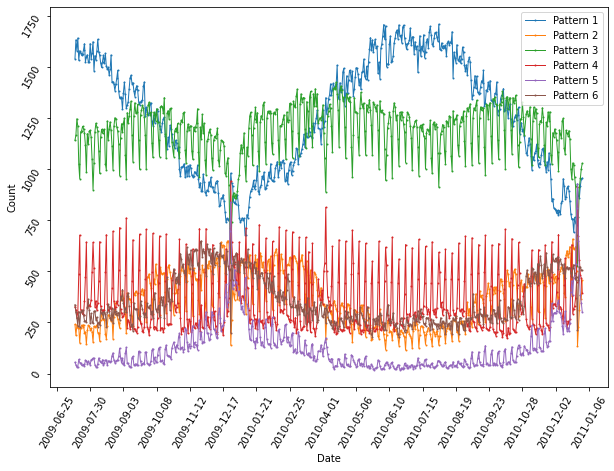

In [34]:
length=[i for i in range(532)]
col=df0T.shape[1]
fig = plt.figure()
fig.set_size_inches(10,7)
ax = fig.add_subplot()
for i in range(col-1):
        ax.plot(df0T['date1'][length], df0T.iloc[:,i][length],linewidth=1,label=labels[i],marker='o',markersize=1)

#ax.set_title(c)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(labelrotation=60)
#ax.set_ylim(0,400)

#plt.tight_layout()
#fig.subplots_adjust(top=0.95)
plt.legend(loc='upper right')
#ax.tick_params(labelrotation=60)
plt.xlabel('Date')
plt.ylabel('Count')
#plt.title('Residential electricity patterns change with date')
plt.show()